In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
dataset = pd.read_csv("social_network_data.csv")
dataset.drop(columns=['Estimated Salary'], inplace=True)
dataset.head(3)

,Age,Purchase
0,56,0
1,46,0
2,32,0


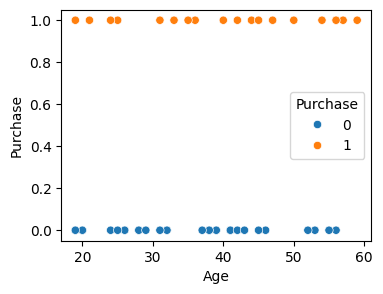

In [8]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchase', data=dataset, hue='Purchase')
plt.show()

In [18]:
x = dataset[["Age"]]
y = dataset["Purchase"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=92)


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
lr.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
lr.score(x_test, y_test)*100

60.0

In [22]:
lr.predict([[30]])

c:\Users\Vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

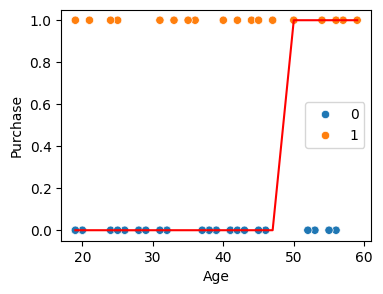

In [23]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchase', data=dataset, hue='Purchase')
sns.lineplot(x="Age",y=lr.predict(x),data=dataset, color='red')
plt.show()

## Example

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



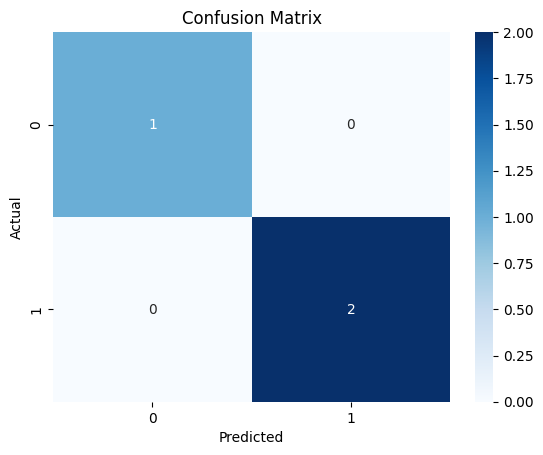

c:\Users\Vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


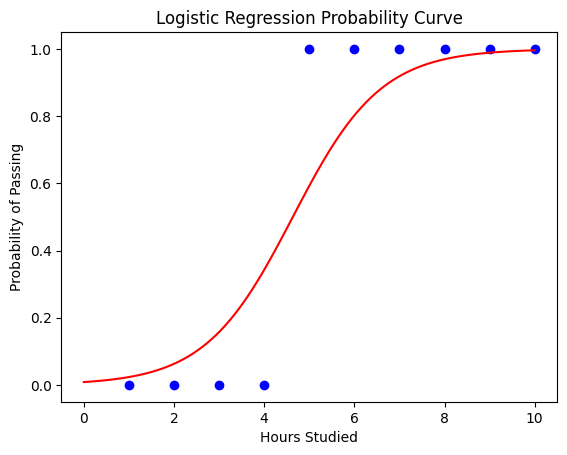

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create custom dataset
data = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# Step 2: Features & target
X = data[['Hours_Studied']]
y = data['Pass']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Probability curve
import numpy as np
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

plt.plot(X_range, y_prob, color='red')
plt.scatter(X, y, color='blue')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Probability Curve")
plt.show()
